In [51]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import pickle

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from modules.BoardState import *
allStates = getAllStates()

In [53]:
state = State(3, 3, 1)
state.data[0][0] = -1
state.data[0][1] = 1
state.data[1][0] = -1
print(state.getHash())
print(state.isEnd())
print(allStates[state.getHash()])
print(len(allStates)*1)

47386
False
(<modules.BoardState.State object at 0x11a8aaef0>, False)
10955


Epoch: 39000 , P1 win rate(train): 0.034 , P2 win rate(train): 0.027
P1 win rate(train):  0.102825
P2 win rate(train):  0.11415


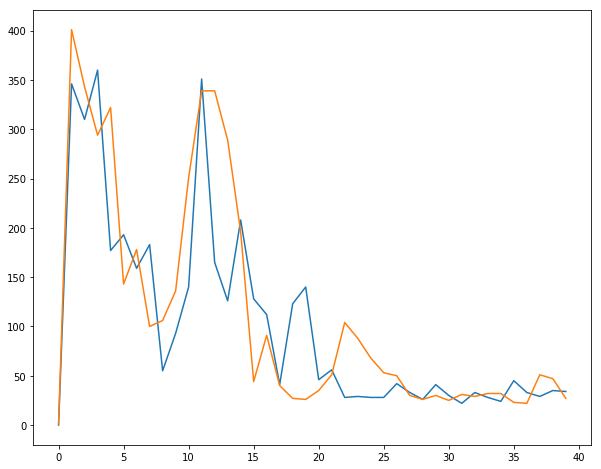

In [117]:
from modules.Solver import *
player1 = Player(allStates, stepSize=0.02, exploreRate=0.02, applyExplorationUpdates=False)
player2 = Player(allStates, stepSize=0.02, exploreRate=0.02, applyExplorationUpdates=False)
judger = Judger(allStates, player1, player2, shuffleFirstPlayer=True)
gamesWonP1Per1000, gamesWonP2Per1000 = train(allStates, player1, player2, judger, 40000)

plt.plot(gamesWonP1Per1000)
plt.plot(gamesWonP2Per1000)
plt.show()
###
# TIC TAC TOE facts:
###
# If both players play the game randomly, the prob. that first player wins is 0.58, second wins is 0.28
# Sources: http://people.missouristate.edu/lesreid/sol10_04.html
# If the first player plays optimally, and second randomly then, the prob that the first player wins is 0.98,
# second wins is 0.0
# If the first player plays randomly, and second optimally then, the prob that the first player wins is 0.0,
# second wins is ~0.80
# Sources: 
# https://blog.ostermiller.org/tic-tac-toe-strategy

In [125]:
def modifyPolicyToOptimal(player):
    for key, val in player.estimations.items():
            if val < 0.49:
                player.estimations[key] = 0
            elif val > 0.50:
                player.estimations[key] = 1
        

In [126]:
player1 = Player(allStates, exploreRate=1)
player2 = Player(allStates, exploreRate=0)
judger = Judger(allStates, player1, player2, feedback=False, shuffleFirstPlayer=False)
player1.loadPolicy()
player2.loadPolicy()
modifyPolicyToOptimal(player2)
compete(judger, 10000)

P1 win rate(compete):  0.0343
P2 win rate(compete):  0.8369


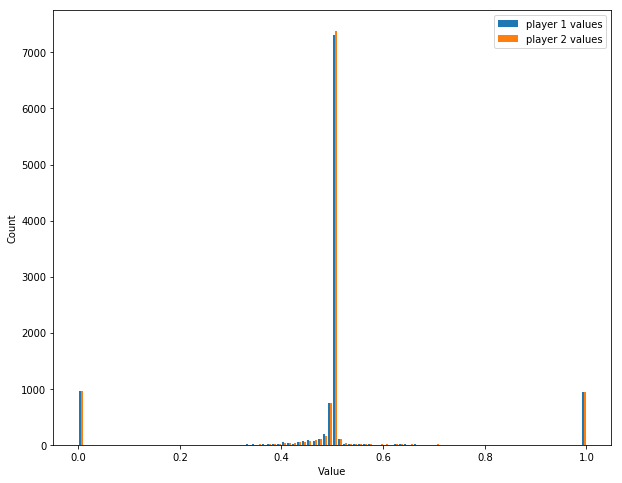

In [120]:
player1 = Player(allStates, exploreRate=0)
player2 = Player(allStates, exploreRate=0)
judger = Judger(allStates, player1, player2, False)
player1.loadPolicy()
player2.loadPolicy()

plt.hist([list(player1.estimations.values()), list(player2.estimations.values())],
         bins=100, label = ['player 1 values', 'player 2 values'])
plt.legend(loc='upper right')
plt.ylabel('Count')
plt.xlabel('Value')
plt.show()